In [1]:
import numpy as np
np.random.seed(0)
np.__version__

'1.26.4'

## Aggregations

The first step is to compute sum
mary statistics for the data in question. Perhaps the most common summary statistic 
 are the mean and standard deviation, which allow you to summarize the “typical”aluesues in a dataset, but other aggregates are useful as well (the sum, product, medi ,
 minimum and maximum, quantiles, etc.).

In [2]:
big_array = np.random.rand(1000000)

In [3]:
big_array.shape

(1000000,)

In [4]:
print('Sum: ',np.sum(big_array))
print('Minimum value: ',np.min(big_array))
print('Maximum value: ',np.max(big_array))

Sum:  500387.69812077284
Minimum value:  7.071203171893359e-07
Maximum value:  0.9999997207656334


In [5]:
 %timeit np.min(big_array)

690 µs ± 8.43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
print(big_array.sum(), big_array.min(), big_array.max())

500387.69812077284 7.071203171893359e-07 0.9999997207656334


In [7]:
# Multidimensional aggregates

M = np.random.random((3, 4))
print(M)

[[0.68955605 0.97451698 0.80805917 0.18081918]
 [0.85541154 0.27965023 0.95573175 0.03659582]
 [0.60934925 0.59753225 0.07463842 0.43803321]]


In [8]:
print(M.sum(), M.min(), M.max())

6.499893854642225 0.0365958240427009 0.9745169832220086


In [9]:
# min within each column
M.min(axis=0)

array([0.60934925, 0.27965023, 0.07463842, 0.03659582])

In [10]:
# max in each row
M.max(axis=1)

array([0.97451698, 0.95573175, 0.60934925])

In [11]:
M.argmin(axis=0) # index of min value of each column

array([2, 1, 2, 1], dtype=int64)

In [12]:
np.median(M)

0.6034407494672613

## Broadcasting

Broadcasting is simply a set of rules for applying binary ufuncs on arrrays of different sizes.

In [13]:
a = np.array([1,5,9])
b = np.array([2, 4, 7])
M = np.ones((3,3))

In [14]:
print('a\n',a)
print('b\n',b)
print('a+b\n',a+b)

a
 [1 5 9]
b
 [2 4 7]
a+b
 [ 3  9 16]


In [15]:
print('M\n',M)

M
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [16]:
a+6

array([ 7, 11, 15])

In [17]:
M+a

array([[ 2.,  6., 10.],
       [ 2.,  6., 10.],
       [ 2.,  6., 10.]])

In [18]:
b = b.reshape((3,1))
b

array([[2],
       [4],
       [7]])

In [19]:
a+b

array([[ 3,  7, 11],
       [ 5,  9, 13],
       [ 8, 12, 16]])

In [20]:
# Example 1: 1D array and a 2D array

M = np.ones((2,3))
a = np.arange(3)
print('M shape:',M.shape)
print('a shape: ',a.shape)

M shape: (2, 3)
a shape:  (3,)


In [21]:
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [22]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [23]:
a+M

array([[1., 2., 3.],
       [1., 2., 3.]])

In [24]:
# Example 2: both arrays need to be broadcast

a = np.arange(3).reshape((3,1))
b = np.arange(3)

In [25]:
print(a)
print(b)
print(a+b)

[[0]
 [1]
 [2]]
[0 1 2]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [26]:
# Example 3: two arrays are not compatible

M = np.ones((3,2))
a = np.arange(3)
print(a)
print(M)
print(M+a)

[0 1 2]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

### Use cases of Broadcasting

1. Centering an array
2. Plotting a 2-D function

In [27]:
X = np.random.randint(0,50,(10,3))
X

array([[ 2, 39, 33],
       [46, 49, 32],
       [33, 22,  0],
       [ 7, 29,  7],
       [ 9, 34,  3],
       [ 2, 14, 30],
       [16, 38, 45],
       [33, 21, 30],
       [ 1, 36, 15],
       [39, 18, 28]])

In [28]:
# Finding mean of each column
Xmean = X.mean(0)
Xmean

array([18.8, 30. , 22.3])

In [29]:
# Centering the data
X = X-Xmean
X.mean(0)

array([-7.10542736e-16,  0.00000000e+00, -3.55271368e-16])

In [30]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50).reshape(-1,1)
print(x.shape)
print(y.shape)

(50,)
(50, 1)


In [31]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [32]:
a = y*x
a.shape

(50, 50)

In [33]:
z.shape

(50, 50)

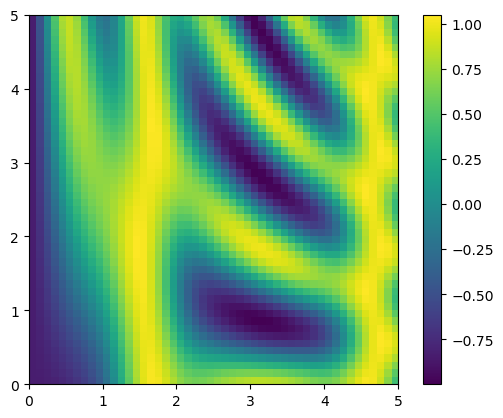

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Comparisons, Masks and Boolean Logic

In [35]:
import pandas as pd

# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')
rainfall.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [36]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape
# The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

(365,)

In [37]:
inches[:10]

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134])

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

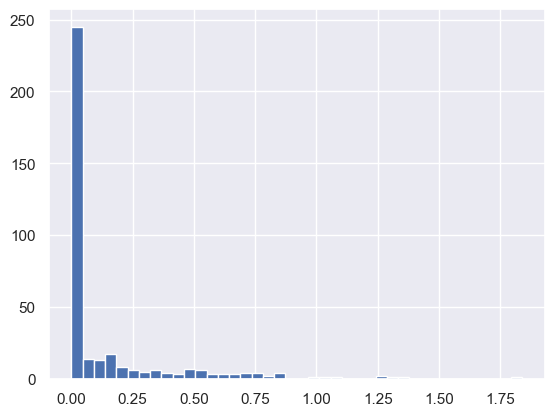

In [39]:
plt.hist(inches, 40)

In [40]:
np.sum((inches>0.5)&(inches<1))

29

In [41]:
print("Number of days without rain:   ", np.sum(inches == 0))
print("Number of days with rain:      ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number of days without rain:    215
Number of days with rain:       150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches  : 75


In [42]:
# construct a mask of all rainy days
rainy = (inches > 0)
rainy

array([False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,

In [43]:
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
summer

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
print("Median precip on rainy days in 2014 (inches):    ",np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):   ",np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):  ",np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches): ",np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):     0.19488188976377951
Median precip on summer days in 2014 (inches):    0.0
Maximum precip on summer days in 2014 (inches):   0.8503937007874016
Median precip on non-summer rainy days (inches):  0.20078740157480315


## Sorting arrays and k-Nearest Neighbors

In [50]:
rand = np.random.RandomState(0)
X = rand.rand(10,2)
X

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

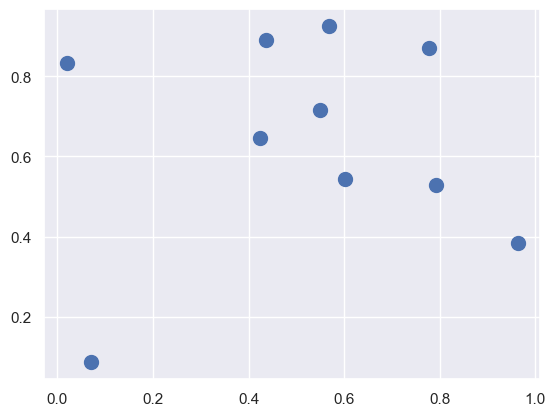

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

The aim is to compute the distance between each pair of point

In [56]:
X.shape

(10, 2)

In [61]:
dist_sq = np.sum((X.reshape((10,1,2)) - X.reshape((1,10,2))) ** 2, axis=-1)

In [62]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [63]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [64]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [65]:
 dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

With the pairwise square-distances converted, we can now use np.arg  sort to sort along each row.
 The leftmost columns will then give the indices of th 
 nearest neighbos:

In [66]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 1 3 6 9 5 4 8 7]
 [1 0 5 2 9 6 3 4 8 7]
 [2 0 1 3 6 5 9 8 4 7]
 [3 6 0 2 9 1 8 5 4 7]
 [4 5 1 9 0 2 6 3 7 8]
 [5 1 4 0 9 2 6 3 8 7]
 [6 3 0 9 2 1 5 8 4 7]
 [7 2 1 8 0 5 3 4 6 9]
 [8 3 2 0 6 1 7 9 5 4]
 [9 6 0 3 5 1 2 4 8 7]]


If we’re simply interested in the nearest k neighbors, all we need is to partition each
 row so that the smallest k + 1 squared distances come first, with larger distances fil
ing the remaining positions of the arr.ay

In [67]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

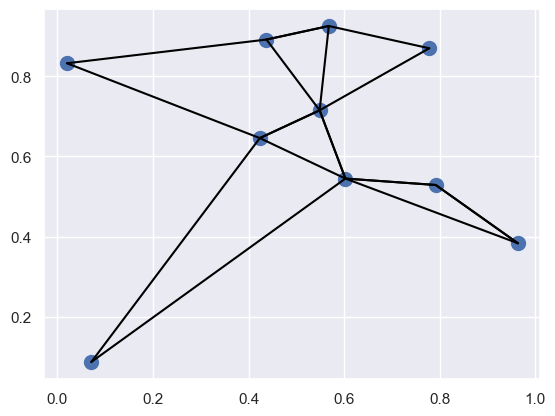

In [68]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')